In [1]:
import numpy as np


<h2> Building a Neural network </h2>

In [3]:
streetlights = np.array([[1,0,1],
                         [0,1,1],
                         [0,0,1],
                         [1,1,1],
                         [0,1,1],
                         [1,0,1]])

weights = np.array([0.5,0.48,-0.7])
alpha = 0.1
walk_vs_stop = np.array([0,1,0,1,1,0])
input = streetlights[0]
goal_prediction = walk_vs_stop[0]
for _ in range(20):
    pred = input.dot(weights)
    error = (pred - goal_prediction) ** 2

    delta = (pred - goal_prediction)

    weights = weights -  alpha * (delta * input)

    print(f'Error : {error:.4f}, Predictions : {pred:.4f}')
    

Error : 0.0400, Predictions : -0.2000
Error : 0.0256, Predictions : -0.1600
Error : 0.0164, Predictions : -0.1280
Error : 0.0105, Predictions : -0.1024
Error : 0.0067, Predictions : -0.0819
Error : 0.0043, Predictions : -0.0655
Error : 0.0027, Predictions : -0.0524
Error : 0.0018, Predictions : -0.0419
Error : 0.0011, Predictions : -0.0336
Error : 0.0007, Predictions : -0.0268
Error : 0.0005, Predictions : -0.0215
Error : 0.0003, Predictions : -0.0172
Error : 0.0002, Predictions : -0.0137
Error : 0.0001, Predictions : -0.0110
Error : 0.0001, Predictions : -0.0088
Error : 0.0000, Predictions : -0.0070
Error : 0.0000, Predictions : -0.0056
Error : 0.0000, Predictions : -0.0045
Error : 0.0000, Predictions : -0.0036
Error : 0.0000, Predictions : -0.0029


<h2> Learning the whole Dataset </h2>

In [5]:
weights = np.array([0.5,0.48,-0.7])
alpha = 0.1

streetlights = np.array([[1,0,1],
                         [0,1,1],
                         [0,0,1],
                         [1,1,1],
                         [0,1,1],
                         [1,0,1]])

walk_vs_stop = np.array([0,1,0,1,1,0])

for _ in range(20):
    error_all_lights = 0
    for idx in range(len(streetlights)):
        input = streetlights[idx]
        goal_pred = walk_vs_stop[idx]

        pred = input.dot(weights)

        error = (pred - goal_pred) ** 2

        error_all_lights += error

        delta = (pred - goal_pred)

        weights = weights - (alpha * delta * input)
        print(f'Predictions : {pred}')
    print(f'Error :{error_all_lights:.4f}')

Predictions : -0.19999999999999996
Predictions : -0.19999999999999996
Predictions : -0.5599999999999999
Predictions : 0.6160000000000001
Predictions : 0.17279999999999995
Predictions : 0.17552
Error :2.6561
Predictions : 0.14041599999999999
Predictions : 0.3066464
Predictions : -0.34513824
Predictions : 1.006637344
Predictions : 0.4785034751999999
Predictions : 0.26700416768
Error :0.9629
Predictions : 0.213603334144
Predictions : 0.5347420299776
Predictions : -0.26067345110016
Predictions : 1.1319428845096962
Predictions : 0.6274723921901568
Predictions : 0.25433999330650114
Error :0.5509
Predictions : 0.20347199464520088
Predictions : 0.6561967149569552
Predictions : -0.221948503950995
Predictions : 1.166258650532124
Predictions : 0.7139004922542389
Predictions : 0.21471099528371604
Error :0.3645
Predictions : 0.17176879622697283
Predictions : 0.7324724146523222
Predictions : -0.19966478845083285
Predictions : 1.1697769945341199
Predictions : 0.7719890116601171
Predictions : 0.172979

<h2> First Deep Neural Network </h2>

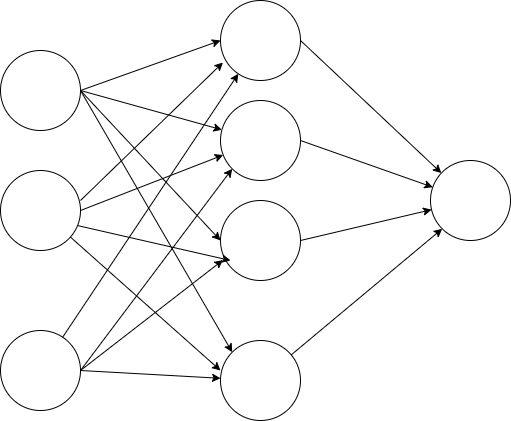

In [61]:
from IPython.display import Image
Image('DeepNeuralNetwork.png')

In [7]:
np.random.seed(1)

def relu(x):
    return (x > 0) * x

alpha = 0.2
hidden_size = 4

streetlights = np.array([[1,0,1],
                         [0,1,1],
                         [1,1,1]])

walk_vs_stop = np.array([[1,1,0,0]]).T

weights_0_1 = 2 * np.random.random((3,hidden_size)) - 1
weights_1_2 = 2 * np.random.random((hidden_size,1)) - 1

layer_0 = streetlights[0]
layer_1 = relu(np.dot(layer_0,weights_0_1))
layer_2 = np.dot(layer_1,weights_1_2)

layer_1,layer_2


(array([-0.        ,  0.51828245, -0.        , -0.        ]),
 array([0.39194327]))

In [21]:
layer_1.shape

(1, 4)

<h2> Backpropagation in code </h2>

In [58]:
np.random.seed(1)
def relu(x):
    return (x > 0) * x

def relu_deriv(x):
    return x > 0

alpha = 0.2
hidden_size = 4

streetlights = np.array([[1,0,1],
                         [0,1,1],
                        [0,0,1],
                        [1,1,1]])
walk_vs_stop = np.array([[1,1,0,0]]).T

weights_0_1 = 2 * np.random.random((3,hidden_size)) - 1
weights_1_2 = 2 * np.random.random((hidden_size,1)) - 1


In [59]:

for iteration in range(60):
    layer_2_error = 0
    for idx in range(0,len(streetlights),1):
        
        layer_0 = streetlights[idx:idx+1]
        
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        
        layer_2 = np.dot(layer_1,weights_1_2)
        
        
        goal_pred = walk_vs_stop[idx:idx+1]
        layer_2_error += np.sum((layer_2 - goal_pred)**2)

        delta_2 = (layer_2 - goal_pred)

        delta_1 = delta_2.dot(weights_1_2.T) * relu_deriv(layer_1)

        weight_delta_2 = layer_1.T.dot(delta_2)
        weight_delta_1 = layer_0.T.dot(delta_1)
        weights_1_2 -= alpha * weight_delta_2
        weights_0_1 -= alpha * weight_delta_1

        888

    print(f'Error : {layer_2_error:.4f}')

Error : 1.4142
Error : 1.2127
Error : 1.0566
Error : 0.9492
Error : 0.8620
Error : 0.7845
Error : 0.7146
Error : 0.6729
Error : 0.6395
Error : 0.6342
Error : 0.5970
Error : 0.5714
Error : 0.5475
Error : 0.5291
Error : 0.5203
Error : 0.4854
Error : 0.4804
Error : 0.4255
Error : 0.3906
Error : 0.3584
Error : 0.3262
Error : 0.2940
Error : 0.2621
Error : 0.2310
Error : 0.2012
Error : 0.1730
Error : 0.1468
Error : 0.1230
Error : 0.1017
Error : 0.0830
Error : 0.0670
Error : 0.0534
Error : 0.0421
Error : 0.0329
Error : 0.0255
Error : 0.0196
Error : 0.0150
Error : 0.0114
Error : 0.0086
Error : 0.0065
Error : 0.0048
Error : 0.0036
Error : 0.0027
Error : 0.0020
Error : 0.0015
Error : 0.0011
Error : 0.0008
Error : 0.0006
Error : 0.0004
Error : 0.0003
Error : 0.0002
Error : 0.0002
Error : 0.0001
Error : 0.0001
Error : 0.0001
Error : 0.0001
Error : 0.0000
Error : 0.0000
Error : 0.0000
Error : 0.0000
